# Predicting used car prices

In this colab, I'll work with the [Kaggle](https://www.kaggle.com/avikasliwal/used-cars-price-prediction) dataset about used cars and their prices. The colab first includes exploration of the dataset followed by prediction of prices.

## Import libraries

I'll import  `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Read dataset

I'll read the dataset and get information about it.

In [ ]:
car=pd.read_csv("https://raw.githubusercontent.com/iamdkcoder/car-price-prediction/master/dataset.csv")
car.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#backup car dataset

In [ ]:
backup_Car= car.copy()

In [ ]:
backup_Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. 


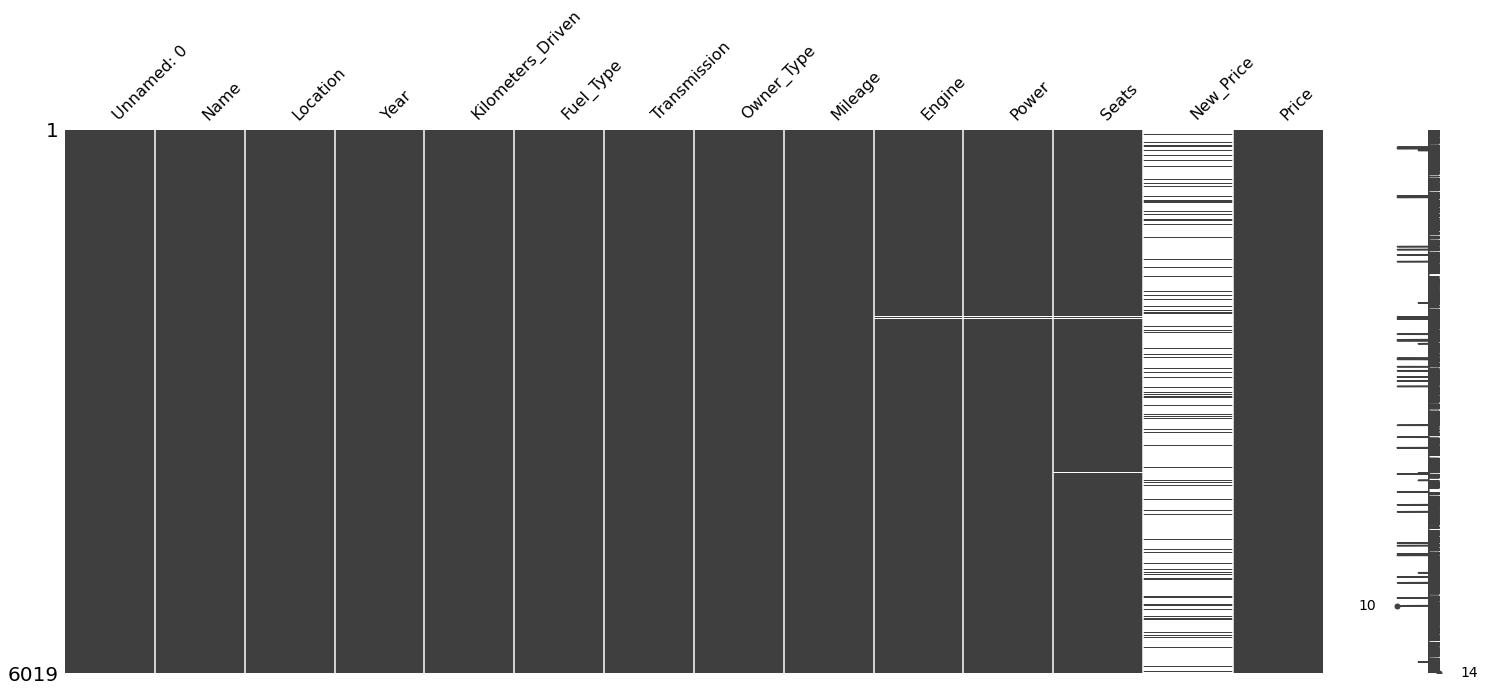

In [ ]:
import missingno as msg
msg.matrix(car)

In [ ]:
car['Owner_Type'].value_counts().nlargest(5)

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

the above results showcase that first hand cars are sold mostly

In [ ]:
car['Kilometers_Driven'].value_counts().nlargest(10)


60000    82
45000    70
65000    68
50000    61
55000    60
70000    60
30000    54
52000    54
80000    50
75000    50
Name: Kilometers_Driven, dtype: int64

The above result showcases the top 10 Car Mileage in Kilometer. This also implies that older cars are being offered for sales than the newer cars.



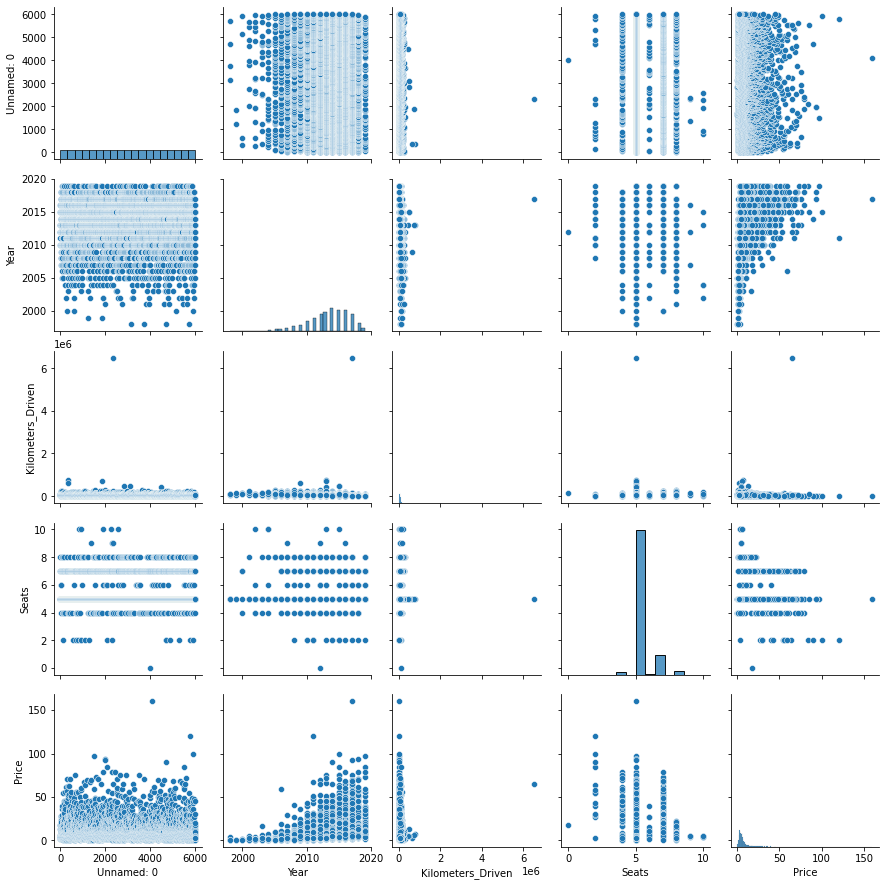

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(car)

In [ ]:
car.info()

### Index

The first column is the index for each data point and hence we can simply remove it.

In [ ]:
car= car.iloc[:,1:]

In [ ]:

#lets check what happend
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


### Name

Let's explore the various cars in the dataset.

In [ ]:
car['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer and model from this column and add it to the dataset.

In [ ]:
car['Manufacturer']=car['Name'].str.split(" ").str.slice(0,1).str.join(' ')
car['Model']= car['Name'].str.split(" ").str.slice(0,3).str.join(' ')

In [ ]:
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Maruti Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Hyundai Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,Audi A4 New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,Maruti Swift VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,Hyundai Xcent 1.1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,Mahindra Xylo D4
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,Maruti Wagon R


Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

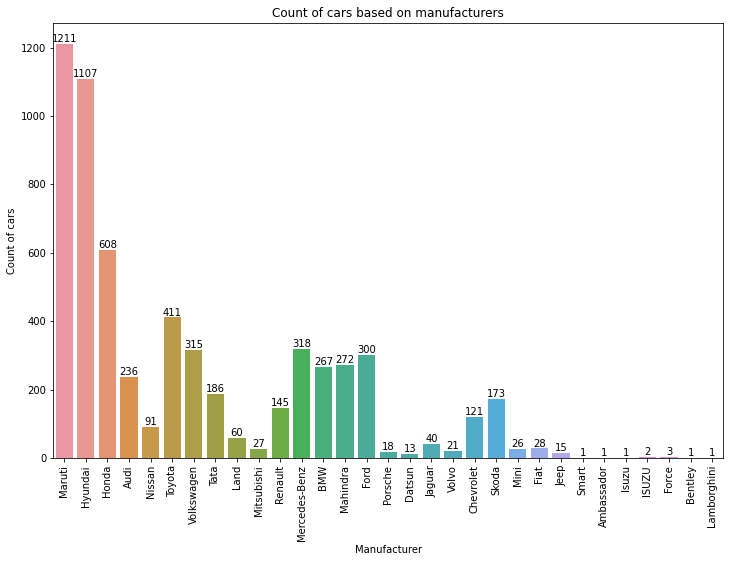

In [ ]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = car)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

In [ ]:
car.drop('Name',axis=1,inplace=True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [ ]:
car.drop('Location',axis=1,inplace=True)

In [ ]:
car["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

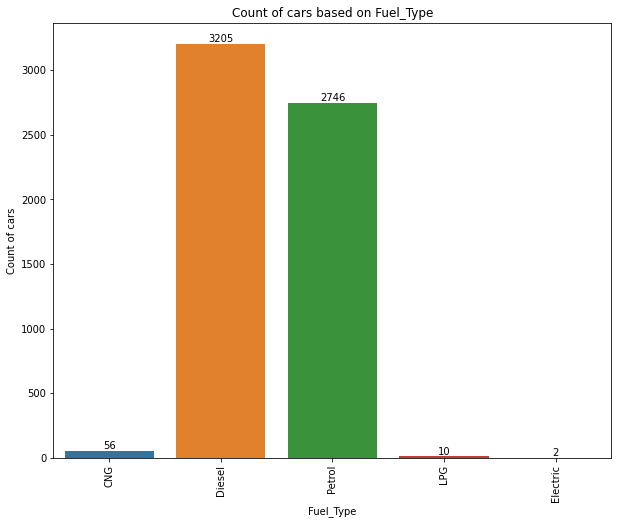

In [ ]:

plt.figure(figsize = (10, 8))
plot = sns.countplot(x = 'Fuel_Type', data = car)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.title("Count of cars based on Fuel_Type")
plt.xlabel("Fuel_Type")
plt.ylabel("Count of cars")
plt.show()

Diesel and petrol cars are sold mostly than CNG , LPG and electric


### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [ ]:
car['Kilometers_Driven']

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

but before that we can will se  mileage units

In [ ]:
kmkg = 0
kmpl = 0
for i in car.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Km/pl : {} '.format(kmpl))

The number of rows with Km/Kg : 66 
The number of rows with Km/pl : 5951 


Soooooo , not many in the list to make that great a difference 
Still gonna do it though....

But first , let us remove the missing values


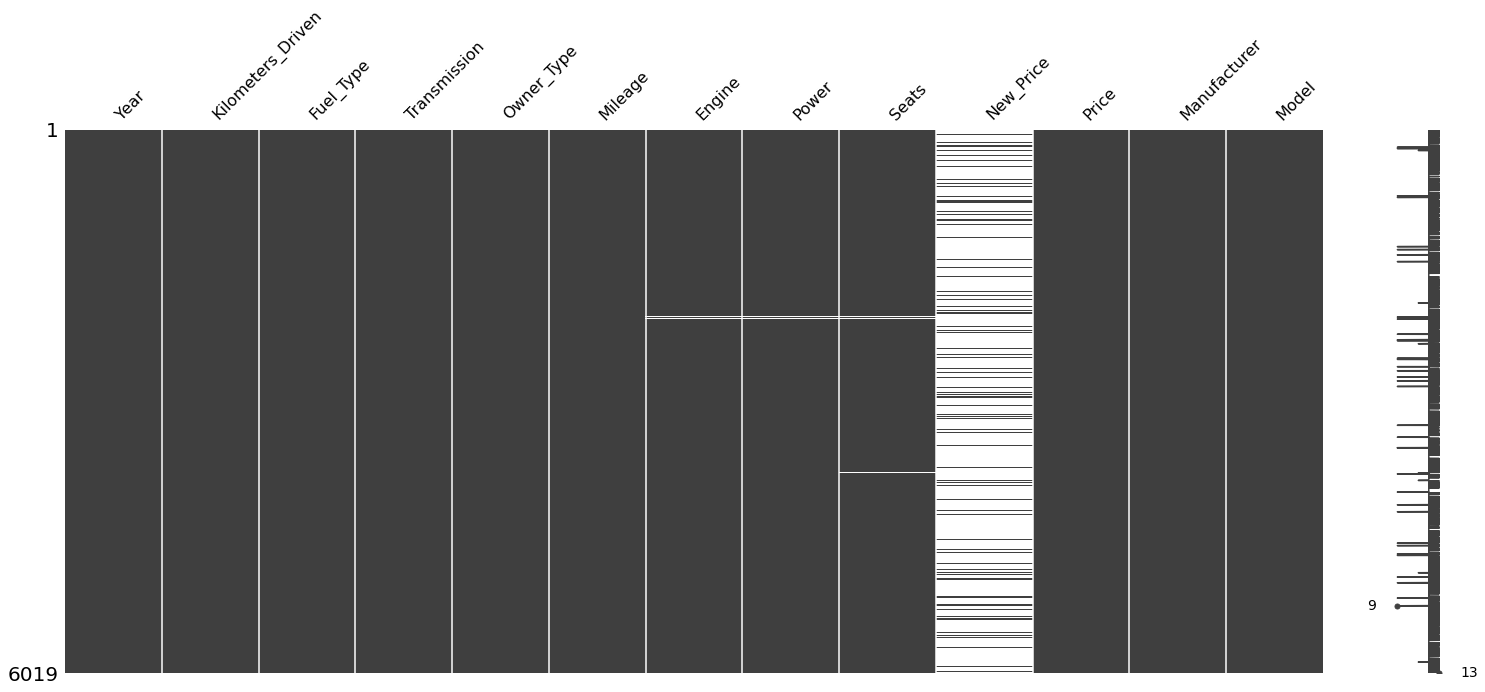

In [ ]:
import missingno as msg
msg.matrix(car)

In [ ]:
car.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

Let's check for missing values.

In [ ]:
print(sum(car["Mileage"].isnull()))

2


so as there are only two value let's remove that row

In [ ]:
car = car.dropna(subset=["Mileage"])


In [ ]:
car['Mileage']


0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6017, dtype: object

In [ ]:
Correct_Mileage= []
for i in car.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
#    for unit in str(i).split(" "):
#        print(type(unit))
#        if unit=='km/kg':
#            print('kmkg')

In [ ]:
car['Mileage']=Correct_Mileage


In [ ]:
car.Mileage

0       37.24
1       19.60
2       18.00
3       20.70
4       15.00
        ...  
6014    28.00
6015    24.00
6016    14.00
6017    18.00
6018    25.40
Name: Mileage, Length: 6017, dtype: float64

In [ ]:
car

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Model
0,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Maruti Wagon R
1,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Hyundai Creta 1.6
2,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Honda Jazz V
3,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Maruti Ertiga VDI
4,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,Audi A4 New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.00,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,Maruti Swift VDI
6015,2015,100000,Diesel,Manual,First,24.00,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,Hyundai Xcent 1.1
6016,2012,55000,Diesel,Manual,Second,14.00,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,Mahindra Xylo D4
6017,2013,46000,Petrol,Manual,First,18.00,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,Maruti Wagon R


### Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [ ]:
cc=car['Engine'].str.split(" ",expand=True)

bhp=car['Power'].str.split(" ",expand=True)

car['Engine']= pd.to_numeric(cc[0],errors='coerce')
car['Power']= pd.to_numeric(bhp[0],errors='coerce')





In [ ]:
car["Engine"].fillna(car["Engine"].astype("float64").mean(), inplace = True)
car["Power"].fillna(car["Power"].astype("float64").mean(), inplace = True)
car["Seats"].fillna(car["Seats"].astype("float64").mean(), inplace = True)


### New Price

As most of the values are missing, I'll drop this column altogether.

In [ ]:
car.drop(["New_Price"], axis = 1, inplace = True)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6017 non-null   int64  
 1   Kilometers_Driven  6017 non-null   int64  
 2   Fuel_Type          6017 non-null   object 
 3   Transmission       6017 non-null   object 
 4   Owner_Type         6017 non-null   object 
 5   Mileage            6017 non-null   float64
 6   Engine             6017 non-null   float64
 7   Power              6017 non-null   float64
 8   Seats              6017 non-null   float64
 9   Price              6017 non-null   float64
 10  Manufacturer       6017 non-null   object 
 11  Model              6017 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 611.1+ KB


#Rearrange columns
 

In [ ]:
cols=list(car.columns.values)
car=car[cols[10:12]+cols[0:10]]
car

,Manufacturer,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai,Hyundai Creta 1.6,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,12.50
2,Honda,Honda Jazz V,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,4.50
3,Maruti,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,6.00
4,Audi,Audi A4 New,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.00,1248.0,74.00,5.0,4.75
6015,Hyundai,Hyundai Xcent 1.1,2015,100000,Diesel,Manual,First,24.00,1120.0,71.00,5.0,4.00
6016,Mahindra,Mahindra Xylo D4,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti,Maruti Wagon R,2013,46000,Petrol,Manual,First,18.00,998.0,67.10,5.0,2.65


#Price in lakhs

In [ ]:
car['Price']=car['Price']*100000

In [ ]:
car

,Manufacturer,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,175000.0
1,Hyundai,Hyundai Creta 1.6,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,1250000.0
2,Honda,Honda Jazz V,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,450000.0
3,Maruti,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,600000.0
4,Audi,Audi A4 New,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,1774000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.00,1248.0,74.00,5.0,475000.0
6015,Hyundai,Hyundai Xcent 1.1,2015,100000,Diesel,Manual,First,24.00,1120.0,71.00,5.0,400000.0
6016,Mahindra,Mahindra Xylo D4,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,290000.0
6017,Maruti,Maruti Wagon R,2013,46000,Petrol,Manual,First,18.00,998.0,67.10,5.0,265000.0


In [ ]:
car.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6.017000e+03
mean,2013.358152,5.874228e+04,17.990371,1621.505935,113.272203,5.278828,9.478340e+05
std,3.269967,9.128375e+04,4.888706,599.316375,53.229183,0.806130,1.118961e+06
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,4.400000e+04
25%,2011.000000,3.400000e+04,15.000000,1198.000000,78.000000,5.000000,3.500000e+05
50%,2014.000000,5.300000e+04,18.000000,1493.000000,98.600000,5.000000,5.640000e+05
75%,2016.000000,7.300000e+04,21.000000,1969.000000,138.030000,5.000000,9.950000e+05
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,1.600000e+07


In [ ]:
car[car["Price"]>10e6]

,Manufacturer,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land,Land Rover Range,2017,25000,Diesel,Automatic,First,13.3,2993.0,255.0,5.0,16000000.0
5781,Lamborghini,Lamborghini Gallardo Coupe,2011,6500,Petrol,Automatic,Third,6.0,5204.0,560.0,2.0,12000000.0


In [ ]:
car=car[car["Price"]<10e6].reset_index(drop=True)

we have outlier of two cars having prices in crore which will affect our model, therefore we will remove it

In [ ]:
car.info()

In [ ]:
import plotly.express as px
px.scatter(car,x = 'Year',y='Kilometers_Driven')

In [ ]:
# Removing outlier
car = car[car['Kilometers_Driven']<6000000]

In [ ]:
px.scatter(car,x = 'Year',y='Kilometers_Driven',color='Kilometers_Driven')


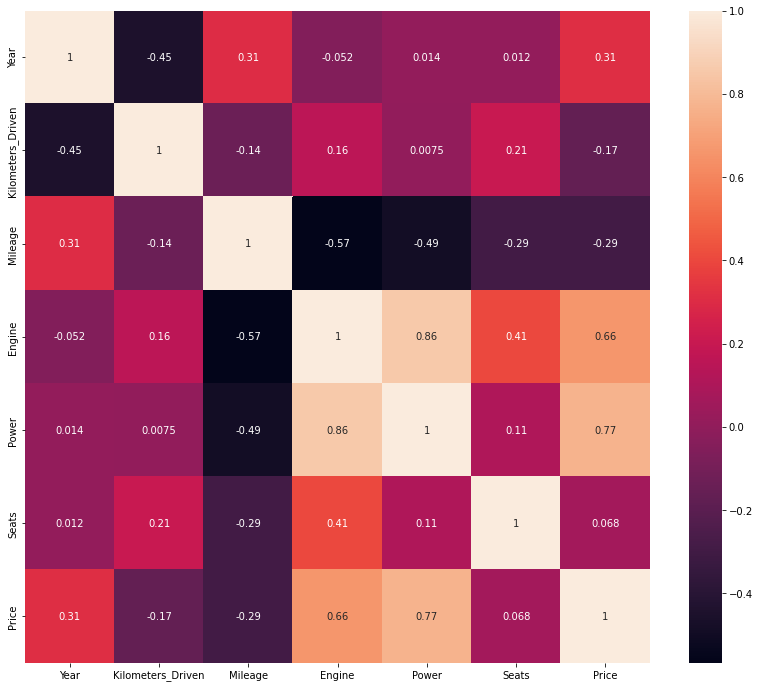

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(car.corr(), annot=True)
plt.savefig('Correlation of Data.png')


# seats and Transmission drop

as we are already having Manufacturer and model , seats and transmission will be extra feature

In [ ]:
car.drop('Seats',axis=1,inplace=True)
car.drop('Transmission',axis=1,inplace=True)

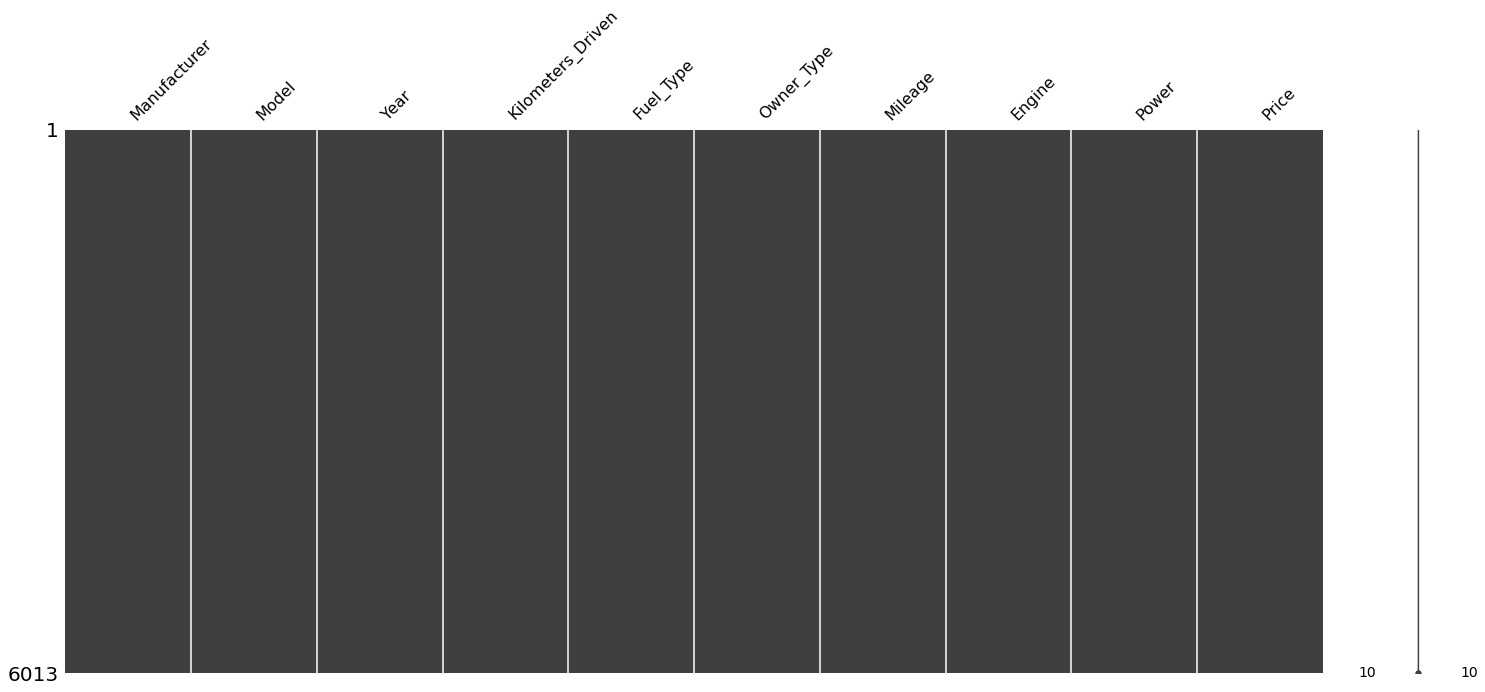

In [ ]:
msg.matrix(car)

#save cleaned dataset


In [ ]:
car.to_csv("cleaned_car.csv")

#model


In [ ]:
X=car.drop(columns='Price')
y=car['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Manufacturer','Model','Fuel_Type', "Owner_Type"]])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Manufacturer','Model','Fuel_Type', "Owner_Type"]), remainder="passthrough")

### lets check best random_State so that our model will give good results

checking random_State in favor of linear regressor

In [ ]:
scores=[]
for i in range(1000):
  x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=i)
  lr = LinearRegression()
  pipe=make_pipeline(column_trans,lr)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)
# random_state value 901 performs best for linear regressor let's check for the others

269

in favor of decision tree regressor

In [ ]:
scores1=[]
for i in range(1000):
  x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=i)
  T = DecisionTreeRegressor()
  pipe=make_pipeline(column_trans,T)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores1.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores1)
# random_state value 667 performs best for linear regressor let's check for the others

49

in favor of random forest regressor

In [ ]:
scores2=[]
for i in range(1000):
  x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=i)
  rf = RandomForestRegressor(n_estimators = 100)
  pipe=make_pipeline(column_trans,rf)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores2.append(r2_score(y_test,y_pred))

In [ ]:
scores2[np.argmax(scores2)]
# random_state value 13 performs best for linear regressor let's check for the others

0.9390430103232675

#splitting train test again for better results

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=269)

linear regressor

In [ ]:
lr = LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8982174548987518

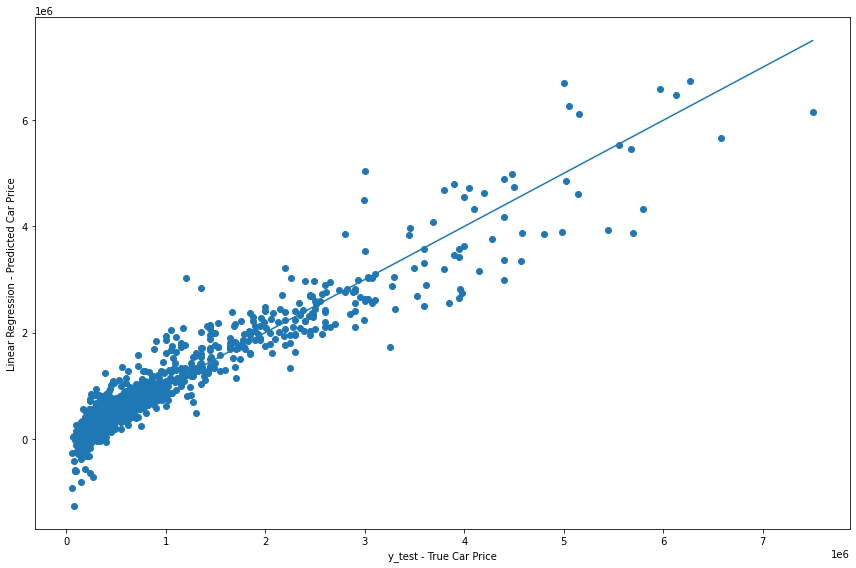

In [ ]:
# create the Scatter plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Linear Regression - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.savefig('linear.png')

In [ ]:
# Dislay MAE, MSE and RMSE for Random Forest Regressor
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMsE:', np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 139984.40523690774
MSE: 64030256115.67565
RMsE: 253042.0046468089


Decison Tree Regressor

In [ ]:
T = DecisionTreeRegressor()
pipe=make_pipeline(column_trans,T)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8774347436465411

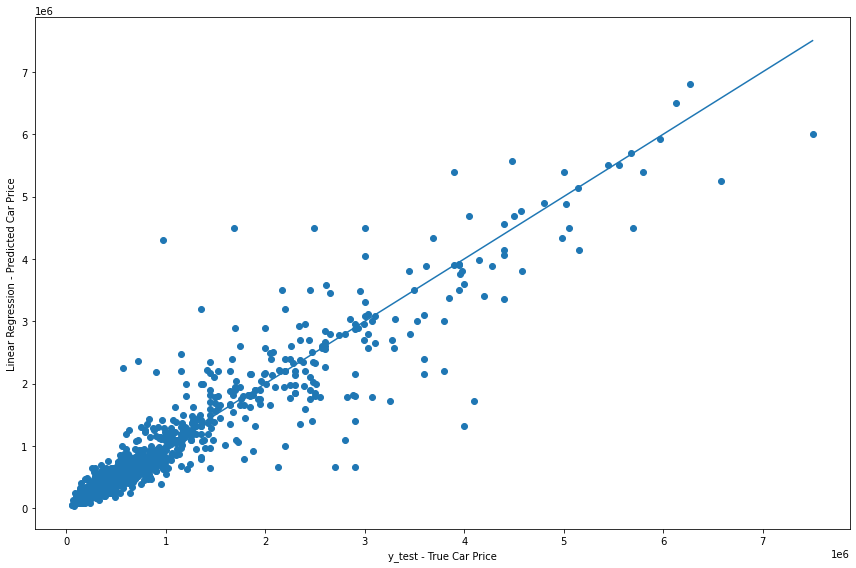

In [ ]:
# create the Scatter plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Decision Tree Regressor - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.savefig('decisiontree.png')

Random Forest Regessor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
pipe=make_pipeline(column_trans,rf)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.9410712571715776

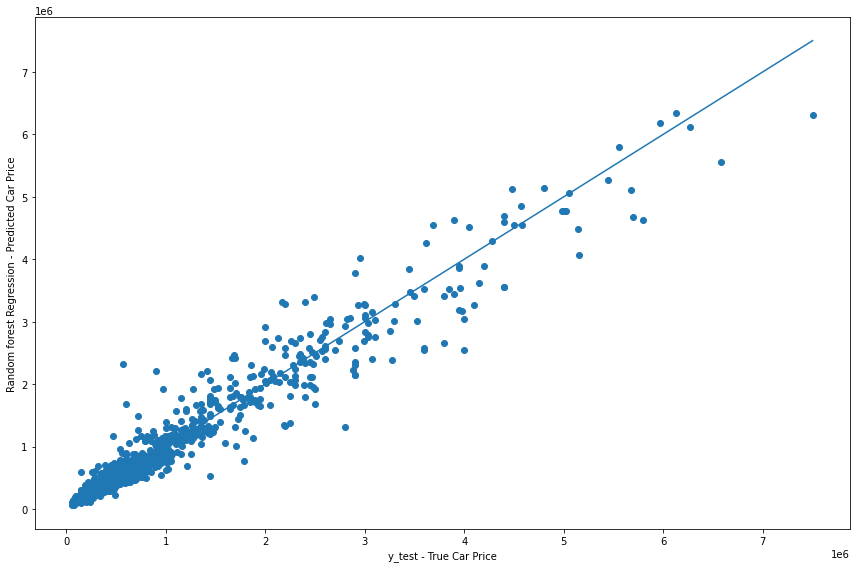

In [ ]:
# create the Scatter plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Random forest Regression - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.savefig('Randomforest.png')

Ensemble- Voting Regressor

In [ ]:
estimators = [('linear_reg', lr), ('tree_reg', T), ('forest_reg', rf)]
ensemble = VotingRegressor(estimators)
pipe=make_pipeline(column_trans,ensemble)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.9404023927429903

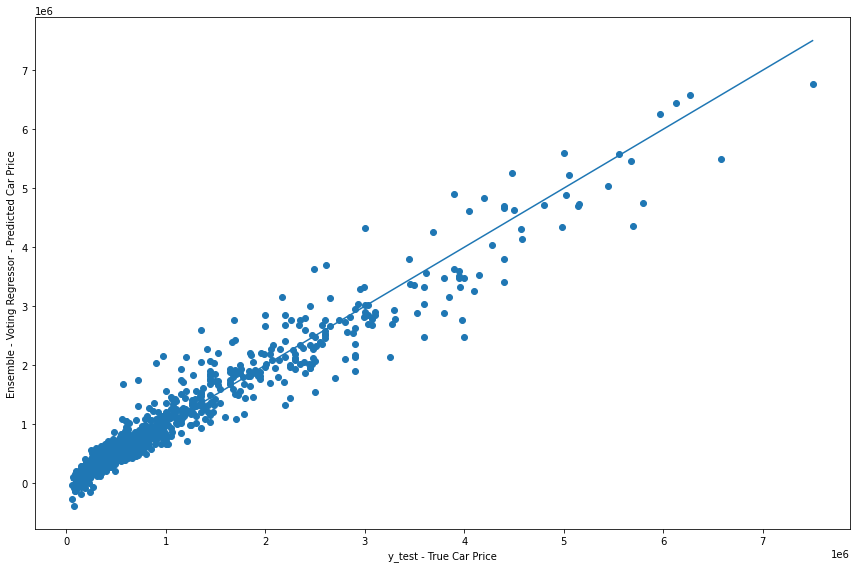

In [ ]:
# create the Scatter plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Ensemble - Voting Regressor - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.savefig('votingregressor.png')

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open("RandomForestRegressionModel.pkl",'wb'))

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       6016 non-null   object 
 1   Model              6016 non-null   object 
 2   Year               6016 non-null   int64  
 3   Kilometers_Driven  6016 non-null   int64  
 4   Fuel_Type          6016 non-null   object 
 5   Owner_Type         6016 non-null   object 
 6   Mileage            6016 non-null   float64
 7   Engine             6016 non-null   float64
 8   Power              6016 non-null   float64
 9   Price              6016 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 470.1+ KB


In [ ]:
pipe.predict(pd.DataFrame([['Maruti','Maruti Wagon R',2019,100,'Petrol',26.60,998,58.16,'First']],columns=['Manufacturer','Model','Year','Kilometers_Driven','Fuel_Type', 'Mileage', 'Engine', 'Power','Owner_Type']))

array([389440.])